# Regression Analysis and Model on Lagos House Rent

<p> Data were obtained from NigPropertyCenter. 4 properties were focused on, 
    <ul>
        <li> The location </li>
        <li> The number of bedrooms and type of building </li>
        <li> The price in Naira </li> 
    </ul> 

</p>

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("LagosRentCleaned.csv", sep=",")
data.head()

,Location,Type,Rooms,Price
0,Lekki,semi-detached duplex,6,5000000
1,Lekki,terraced duplex,3,2500000
2,Gbagada,terraced duplex,4,4000000
3,Lekki,detached duplex,4,4600000
4,Lekki,detached duplex,4,3000000


In [3]:
pd.DataFrame(data.describe())

,Rooms,Price
count,2026.000000,2.026000e+03
mean,4.059230,6.334911e+06
std,1.315978,1.177936e+07
min,1.000000,9.000000e+04
25%,4.000000,3.000000e+06
50%,4.000000,4.000000e+06
75%,4.000000,6.000000e+06
max,45.000000,3.000000e+08


In [4]:
print(data[data['Rooms']==45])
print(data[data['Price']== 90000])

Location             Type  Rooms    Price
1743    Lekki  detached duplex     45  3000000
     Location             Type  Rooms  Price
1366       VI  terraced duplex      4  90000


In [5]:
print(data[data['Rooms']==16])
print(data[data['Price']== 100000])

Location                  Type  Rooms    Price
1334    Lekki  semi-detached duplex     16  5000000
     Location             Type  Rooms   Price
1028    Ikoyi  terraced duplex      4  100000


In [6]:
print(data[data['Rooms']==15])
print(data[data['Price']== 130000])

Location             Type  Rooms    Price
1824    Lekki  detached duplex     15  6000000
     Location            Type  Rooms   Price
1533      Ojo  flat apartment      1  130000


In [7]:
data.drop(index=[1028, 1334, 1366, 1743, 1824], inplace=True)

In [8]:
data.describe()

,Rooms,Price
count,2021.000000,2.021000e+03
mean,4.027709,6.343563e+06
std,0.880607,1.179202e+07
min,1.000000,1.300000e+05
25%,4.000000,3.000000e+06
50%,4.000000,4.000000e+06
75%,4.000000,6.000000e+06
max,9.000000,3.000000e+08


In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [10]:
data['Type'].unique()

array(['semi-detached duplex', 'terraced duplex', 'detached duplex',
       'flat apartment', 'detached bungalow', 'semi-detached bungalow',
       'block of', 'terraced bungalow'], dtype=object)

In [11]:
data['Type'][data['Type'] == 'block of flat'] = 'flat of apartment'

In [14]:
data['Location'].value_counts()

Lekki       1283
Ikoyi        301
VI           156
Ajah         124
Ikeja         55
Magodo        25
Ikorodu       11
Yaba          11
Surulere      10
Maryland       9
North          7
Gbagada        5
Agege          3
Alimosho       3
Ojodu          3
Isheri         2
Island         2
Ilupeju        2
Ojo            2
Ketu           2
Shomolu        1
Isolo          1
Apapa          1
Ipaja          1
Ibeju          1
Name: Location, dtype: int64

<p> From the above counts, it is obvious that the model does now have enough data from locations that appared once or less than 10 times. It is going to be biased towards those region. Hence, they are removed for the purpose of this model </p>

In [15]:
data_filter = data[data['Location'].str.contains('Lekki') | data['Location'].str.contains('Ikoyi') | data['Location'].str.contains('VI') | data['Location'].str.contains('Ajah') | data['Location'].str.contains('Ikeja') | data['Location'].str.contains('Magodo') | data['Location'].str.contains('Ikorodu') | data['Location'].str.contains('Yaba') | data['Location'].str.contains('Surulere')].reset_index().drop(columns='index')

In [16]:
data_filter['Type'].value_counts()

terraced duplex           747
semi-detached duplex      491
detached duplex           463
flat apartment            212
semi-detached bungalow     34
detached bungalow          23
terraced bungalow           5
block of                    1
Name: Type, dtype: int64

<p> We can equally drop the last two building type from the dataframe. </p> 

In [17]:
data_filter = data_filter[data_filter['Type'].str.contains('terraced duplex') | data_filter['Type'].str.contains('detached duplex') | data_filter['Type'].str.contains('semi-detached duplex') | data_filter['Type'].str.contains('flat apartment') | data_filter['Type'].str.contains('semi-detached bungalow') | data_filter['Type'].str.contains('detached bungalow')].reset_index().drop(columns='index')

In [18]:
data_filter

,Location,Type,Rooms,Price
0,Lekki,semi-detached duplex,6,5000000
1,Lekki,terraced duplex,3,2500000
2,Lekki,detached duplex,4,4600000
3,Lekki,detached duplex,4,3000000
4,Lekki,detached duplex,5,4000000
...,...,...,...,...
1965,Lekki,flat apartment,4,3200000
1966,Lekki,terraced duplex,4,3000000
1967,VI,semi-detached duplex,4,4500000
1968,Lekki,terraced duplex,4,3000000


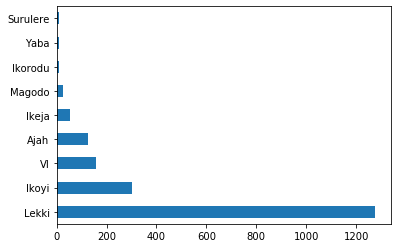

In [19]:
data_filter['Location'].value_counts().plot(kind='barh')

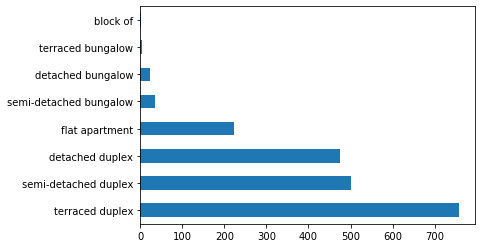

In [20]:
data['Type'].value_counts().plot(kind='barh')

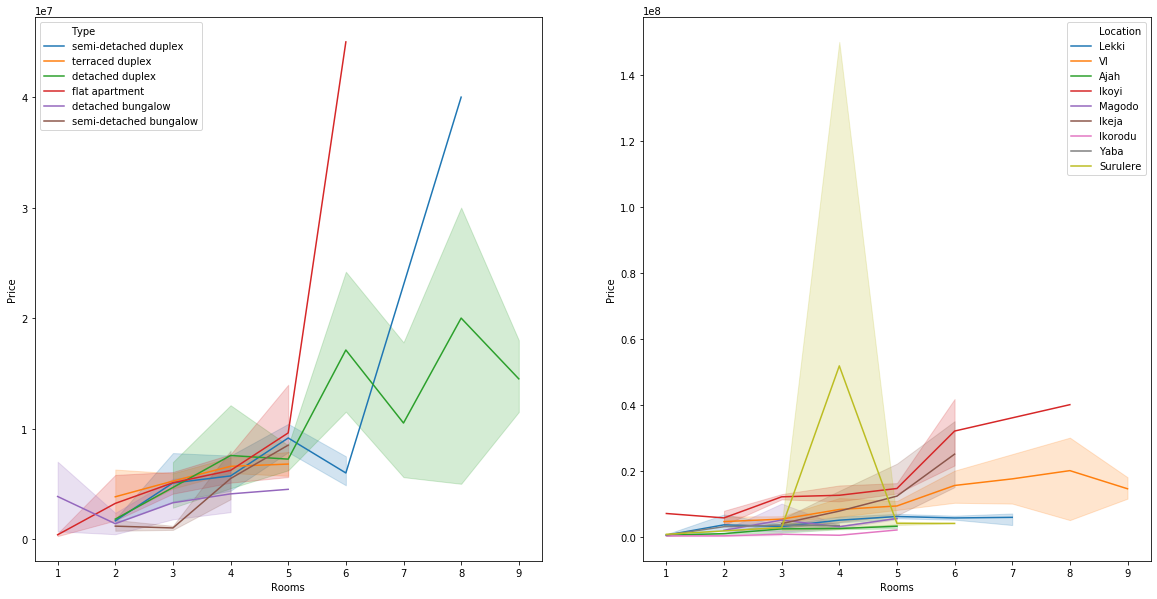

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.lineplot(x='Rooms', y='Price', hue='Type', data=data_filter)
plt.subplot(1, 2, 2)
sns.lineplot(x='Rooms', y='Price', hue='Location', data=data_filter)

<p> Above plot further backed our intuition that there is a linear relationship between the location, type of houses and number of rooms and the price. </p>


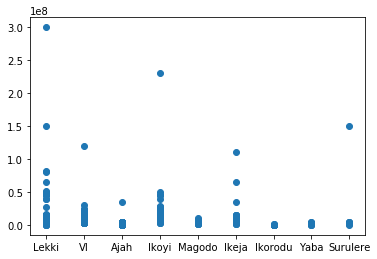

In [23]:
plt.scatter('Location', 'Price', data=data_filter)

In [36]:
X = np.array(data_filter[['Location', 'Type', 'Rooms']])
y = np.array(data_filter['Price'])

In [37]:
data_filter.corr()

,Rooms,Price
Rooms,1.0000,0.1235
Price,0.1235,1.0000


In [38]:
enc = LabelEncoder()
X[:, 1] = enc.fit_transform(X[:, 1])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0])], remainder='passthrough')
X = ct.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=835)

In [40]:
X_train

array([[0.0, 0.0, 0.0, ..., 0.0, 4, 4],
       [0.0, 0.0, 0.0, ..., 0.0, 5, 4],
       [0.0, 1.0, 0.0, ..., 0.0, 1, 4],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 2, 4],
       [0.0, 0.0, 0.0, ..., 0.0, 1, 9],
       [0.0, 0.0, 0.0, ..., 0.0, 2, 3]], dtype=object)

In [41]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
acc = reg.score(X_train, y_train)
pred = reg.predict(X_test)
metric = mean_squared_error(y_test, pred)
coef = reg.coef_
int_ = reg.intercept_
err = np.sqrt(metric)
abs = mean_absolute_error(y_test, pred)

In [49]:
print('Accuracy Score: ', acc, '\n', 'MSE: ', metric, '\n', 'Absolute Error: ', abs)
print( 'Coefficient: ', coef)
print('Intercept: ', int_)

Accuracy Score:  0.3127774989416884 
 MSE:  372875691015942.5 
 Absolute Error:  4113420.3993231812
Coefficient:  [-1.03026713e+19 -1.03026713e+19 -1.03026713e+19 -1.03026713e+19
 -1.03026713e+19 -1.03026713e+19 -1.03026713e+19 -1.03026713e+19
 -1.03026713e+19 -1.79200000e+05  1.61382400e+06]
Intercept:  1.0302671301828823e+19


In [52]:
for i in range(len(pred)):
    if i <= round(0.1 * (len(pred))):
        print(y_test[i], pred[i])


4000000 6367232.0
4200000 6367232.0
3500000 4214784.0
4500000 6367232.0
4000000 12568576.0
8500000 12746752.0
3500000 4214784.0
15000000 6367232.0
15000000 7981056.0
3300000 4036608.0
2500000 4214784.0
4500000 5949440.0
12000000 6367232.0
4000000 4214784.0
5000000 7026688.0
3000000 4214784.0
600000 -1894400.0
4500000 6367232.0
10000000 7211008.0
4000000 2422784.0
5000000 5949440.0
9000000 14360576.0
3000000 2959360.0
5000000 7442432.0
3000000 3946496.0
2500000 2959360.0
3000000 8108032.0
4000000 4573184.0
3500000 2959360.0
2500000 2588672.0
9500000 14360576.0
2500000 4036608.0
3500000 4036608.0
2500000 2422784.0
6000000 4036608.0
3800000 4753408.0
2000000 1345536.0
9000000 9357312.0
3500000 4036608.0
2500000 4753408.0
4000000 4214784.0
3000000 4214784.0
16000000 14360576.0
2700000 4036608.0
27000000 1345536.0
2000000 3127296.0
10000000 11132928.0
4500000 4036608.0
7000000 7026688.0
3500000 4753408.0
1500000 2588672.0
5000000 4036608.0
4000000 2422784.0
5500000 2422784.0
4500000 4036608

In [ ]:
import  matplotlib.pyplot as plt
plt.scatter( pred, np.arange(len(pred)), color='blue')
plt.plot(y_test, np.arange(len(pred)), color='red')
plt.show()